<a href="https://colab.research.google.com/github/aryasohani/Minor/blob/main/Plant_Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip PlantVillagezip.zip

Archive:  PlantVillagezip.zip
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: PlantVillage/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 224, 224, 3)
[0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 2 1 1 1 0 1 0 1]


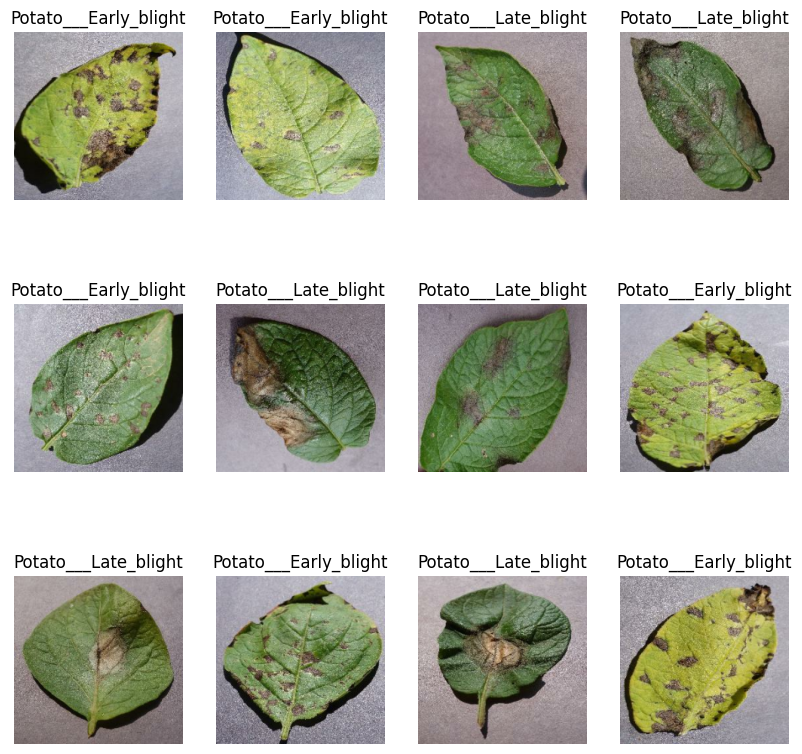

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.6921769  0.7039416  0.73139256]
  [0.66974795 0.68151265 0.70896363]
  [0.6722689  0.68403363 0.7114846 ]
  ...
  [0.5785315  0.5942178  0.6412766 ]
  [0.59025615 0.6059424  0.65300125]
  [0.59974    0.6154263  0.6624851 ]]

 [[0.6880152  0.6997799  0.7272309 ]
  [0.66974795 0.68151265 0.70896363]
  [0.6722689  0.68403363 0.7114846 ]
  ...
  [0.59189683 0.6075831  0.6546419 ]
  [0.5978392  0.61352545 0.6605843 ]
  [0.60202086 0.61770713 0.66476595]]

 [[0.6838535  0.6956182  0.7230692 ]
  [0.670048   0.6818127  0.7092637 ]
  [0.67316926 0.68493396 0.71238494]
  ...
  [0.59517807 0.61086434 0.65792316]
  [0.59357744 0.6092637  0.65632254]
  [0.59197676 0.60766304 0.65472186]]

 ...

 [[0.52615076 0.5222292  0.54183704]
  [0.519328   0.5154064  0.5350143 ]
  [0.54419774 0.54027617 0.559884  ]
  ...
  [0.3693076  0.3810723  0.40808293]
  [0.36324513 0.37500983 0.3952179 ]
  [0.36636633 0.38177258 0.39409736]]

 [[0.5261704  0.5222488  0.54185665]
  [0.54709905 0.5431775  0.5627853 ]


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
BATCH_SIZE

32

In [ ]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [ ]:
# Load the model
model = VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
#restructure the model
model = Model(inputs=model.inputs, outputs = model.layers[-2].output)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#extract the feature
feature = model.predict(train_ds, verbose=0)

In [ ]:
#store the feature
extracted_features = feature

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
#cnn model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
cnn_model = Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape= input_shape), #(output channels, (height, width))
    MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

cnn_model.build(input_shape = input_shape)

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                 

In [ ]:
cnn_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
#cnn_model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 11s 83ms/step - loss: 0.8879 - accuracy: 0.4983 - val_loss: 0.7594 - val_accuracy: 0.6042
Epoch 2/50
54/54 [==============================] - 3s 46ms/step - loss: 0.5696 - accuracy: 0.7465 - val_loss: 0.3617 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - 2s 45ms/step - loss: 0.4626 - accuracy: 0.8090 - val_loss: 0.3446 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 3s 46ms/step - loss: 0.3658 - accuracy: 0.8542 - val_loss: 0.3596 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 2s 46ms/step - loss: 0.3801 - accuracy: 0.8351 - val_loss: 0.1957 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 2s 46ms/step - loss: 0.2673 - accuracy: 0.8906 - val_loss: 0.2186 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 2s 45ms/step - loss: 0.2299 - accuracy: 0.9016 - val_loss: 0.2524 - val_accuracy: 0.8906
Epoch 8/50
54/54 [=====

In [ ]:
cnn_model.evaluate(test_ds)

8/8 [==============================] - 2s 75ms/step - loss: 0.0265 - accuracy: 0.9828


[0.026506856083869934, 0.982758641242981]

In [ ]:
cnn_model.save("my_model")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
loaded_model = tf.keras.models.load_model("my_model")

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model("my_model")

# Display the model summary
print(loaded_model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
# Define the directory path where you want to save your model
save_path = 'D:\Minor Dataset\saved.txt'

# Create the directory if it doesn't exist
import os
os.makedirs(save_path, exist_ok=True)

# Save the model to the specified directory in the SavedModel format
model.save(save_path, save_format='tf')


In [ ]:
import os

# Create the directory if it doesn't exist
save_dir = '/content/D:\Minor Dataset\saved.txt'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model
model.save('/content/saved_models/saved_model.pb')

<IPython.core.display.Javascript object>

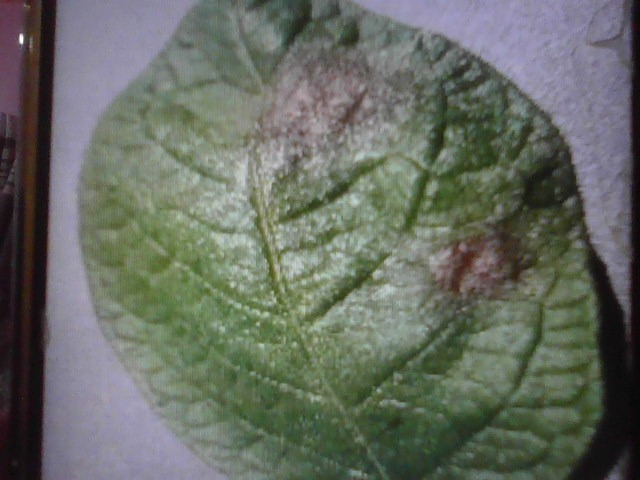

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import base64

def capture_image():
    js = Javascript('''
        async function captureImage() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg');
        }
        ''')
    display(js)
    data = eval_js('captureImage()')
    binary = base64.b64decode(data.split(',')[1])
    image = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)
    return image

# Capture image from camera and store it in a variable
captured_image = capture_image()

# Display the captured image
cv2_imshow( captured_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model in HDF5 format
loaded_model = tf.keras.models.load_model("my_model")

# Define a function to preprocess the input image
def preprocess_image(image_path, target_size):
    try:
        img = image.load_img(image_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print("Error loading and preprocessing image:", e)
        return None

# Preprocess the new input image
input_image = preprocess_image("/content/potato2.JPG", target_size=(224, 224))

if input_image is not None:
    # Make predictions
    predictions = loaded_model.predict(input_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Assuming you have defined class_names correctly
    class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # Define your class names
    if predicted_class_index < len(class_names):
        predicted_class = class_names[predicted_class_index]
        print("Predicted class:", predicted_class)
    else:
        print("Error: Predicted class index out of range.")
else:
    print("Error: Preprocessing failed.")


1/1 [==============================] - 0s 492ms/step
Predicted class: Potato___Late_blight


In [ ]:
'''import pickle

# Assuming 'model' is your trained machine learning model
with open('cnn_model.pkl', 'wb') as f:
    pickle.dump(cnn_model, f)
'''

In [ ]:
'''with open('cnn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)'''


In [ ]:
# Save the Keras model
model.save('cnn_model.h5')

# Load the saved Keras model
loaded_model = tf.keras.models.load_model('cnn_model.h5')

In [ ]:
#cnn_model.save("my_model")

In [ ]:
'''# Define the directory path where you want to save your model
save_path = 'D:\Minor Dataset\saved.txt'

# Create the directory if it doesn't exist
import os
os.makedirs(save_path, exist_ok=True)

# Save the model to the specified directory in the SavedModel format
model.save(save_path, save_format='tf')'''


In [ ]:
#model.save('/content/drive/MyDrive/Flask_folder/saved_model.pb', save_format='tf')
#model.save('/content/cnn_model.pkl', save_format='')

#main save code

In [ ]:
'''import os

# Create the directory if it doesn't exist
save_dir = '/content/D:\Minor Dataset\saved.txt'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model
model.save('/content/saved_models/saved_model.pb')'''

# prediction

In [ ]:
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Define a function to preprocess the image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess the new input image
input_image = preprocess_image("/content/potato.jpg", target_size=(224, 224))

# Load the saved model
loaded_model = tf.keras.models.load_model("cnn_model.h5")

# Make predictions
#predictions = loaded_model.predict(input_image)
#
## Get the predicted class index
#predicted_class_index = np.argmax(predictions)
#
## Assuming you have defined class_names correctly
#class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # Define your class names
#predicted_class = class_names[predicted_class_index]
#
#print("Predicted class:", predicted_class)


In [ ]:
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess the new input image
input_image = preprocess_image("/content/potato.jpg", target_size=(224, 224))


# Load the saved model using pickle
with open("cnn_model.h5", "rb") as f:
    loaded_model = pickle.load(f)

# Make predictions
predictions = loaded_model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Assuming you have defined class_names correctly
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # Define your class names
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)

In [ ]:
'''import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model in HDF5 format
loaded_model = tf.keras.models.load_model("my_model")

# Define a function to preprocess the input image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess the new input image
input_image = preprocess_image("/content/potato.jpg", target_size=(224, 224))

# Make predictions
predictions = loaded_model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Assuming you have defined class_names correctly
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # Define your class names
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)'''


In [ ]:
'''import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model

loaded_model = tf.keras.models.load_model("my_model")

# Load the saved image using OpenCV
saved_image = cv2.imread('photo.jpg')

# Define a function to preprocess the image for prediction
def preprocess_image(img, image_size):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (image_size, image_size))
    img = img.astype("float") / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Preprocess the saved image
preprocessed_img = preprocess_image(saved_image, IMAGE_SIZE)

# Make predictions using the loaded model
prediction = loaded_model.predict(preprocessed_img)

# Get the predicted class
predicted_class_index = np.argmax(prediction)

if predicted_class_index < len(class_names):
    predicted_class = class_names[predicted_class_index]
    print("Predicted class:", predicted_class)
else:
    print("Error: Predicted class index out of range.")'''


In [ ]:
#cnn_model.predict(take_photo)

In [ ]:
def generate_shopping_link(item):
    # Dictionary containing item keywords and corresponding shopping website links
    shopping_links = {
        "late blight": "https://iffcourbangardens.com/products/dr-neem-oil-ready-to-use?variant=44615256637728&currency=INR&utm_medium=product_sync&utm_source=google&utm_content=sag_organic&utm_campaign=sag_organic&gad_source=4&gclid=CjwKCAjw48-vBhBbEiwAzqrZVH8_svE7xPUvjiB6YtzxUZIVC1mZNqcNoNls4CD0DS_6c4ZfMSDYHxoCRAwQAvD_BwE",
        "early blight": "https://www.iffcobazar.in/en/product/all-rounder-plant-disease-management-yield-booster?campaignid=20267780317&utm_source=Google&utm_medium=PMax&utm_campaign=PMax&gad_source=4&gclid=CjwKCAjw48-vBhBbEiwAzqrZVJEeKGF12jvO6UODHFInn5IzAfzacIKzKsfGy2S9wX-7vf8AvkUYZRoC88sQAvD_BwE#all-rounder-plant-disease-management-yield-booster-1-litre",
        # Add more items and corresponding links as needed
    }

    # Convert input to lowercase for case-insensitive matching
    item = item.lower()

    # Check if the item exists in the dictionary
    if item in shopping_links:
        return shopping_links[item]
    else:
        return "Sorry, we don't have a link for that item."

def main():
    user_input = input("Enter the item you want to search for: ")
    shopping_link = generate_shopping_link(user_input)
    print("Links to websites for medication", shopping_link)

if __name__ == "__main__":
    main()


Enter the item you want to search for: late blight
Links to websites for medication https://iffcourbangardens.com/products/dr-neem-oil-ready-to-use?variant=44615256637728&currency=INR&utm_medium=product_sync&utm_source=google&utm_content=sag_organic&utm_campaign=sag_organic&gad_source=4&gclid=CjwKCAjw48-vBhBbEiwAzqrZVH8_svE7xPUvjiB6YtzxUZIVC1mZNqcNoNls4CD0DS_6c4ZfMSDYHxoCRAwQAvD_BwE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')